1.	 b) Multi Layer Perceptron

2.	b)Feedforward Neural Network

3.	b)To introduce non-linearity

4.	d)All of the above

5. c] Accepts raw input data

6. d] Backpropagation

7. b] Connections between neurons

8. c] Providing final predictions

9.  d] All of the above

10. d] Lack of generalization

11. b] A computational unit performing weighted sums and activation

12.  a] Randomly

13. c] By applying regularization (e.g., dropout, L2 norm)


14. b] To learn features from the input data

15. b] Outputs the same value as the input if it's positive; otherwise 0

16. b] Probabilities summing to 1


17. b] To adjust the step size for weight updates

18. b] It measures the difference between predicted and true outputs

19. b] Cross-Entropy Loss

20. a] MLP has multiple layers of neurons



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
model = Sequential()


model.add(Flatten(input_shape=(28, 28)))


model.add(Dense(128, activation='relu'))  # 1st hidden layer
model.add(Dense(64, activation='relu'))   # 2nd hidden layer
model.add(Dense(32, activation='relu'))   # 3rd hidden layer

# Output layer with softmax activation
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
train_model = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8397 - loss: 0.5207 - val_accuracy: 0.9607 - val_loss: 0.1368
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9655 - loss: 0.1143 - val_accuracy: 0.9656 - val_loss: 0.1196
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9759 - loss: 0.0786 - val_accuracy: 0.9678 - val_loss: 0.1039
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9723 - val_loss: 0.0983
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9847 - loss: 0.0466 - val_accuracy: 0.9695 - val_loss: 0.1188
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9880 - loss: 0.0374 - val_accuracy: 0.9715 - val_loss: 0.1099
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9694 - val_loss: 0.1274
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.027

In [11]:
def plot_graph(model,x,y,x_label, y_label):
    # Plotting the training loss curve
    plt.plot(model.history[x], label=x_label)

    # Plotting the validation loss curve
    plt.plot(model.history[y], label=y_label)

    # Adding legend to the plot
    plt.legend()

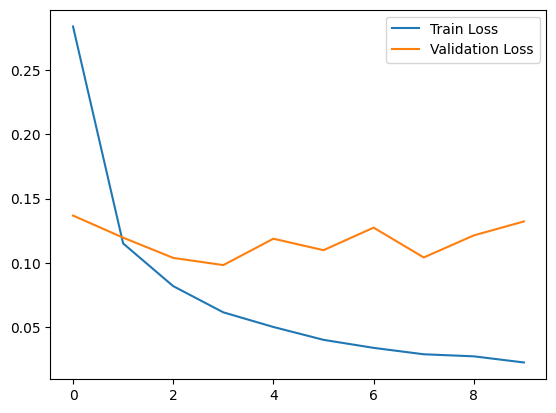

In [12]:

plot_graph(model=train_model, x='loss', y='val_loss', x_label='Train Loss', y_label='Validation Loss')

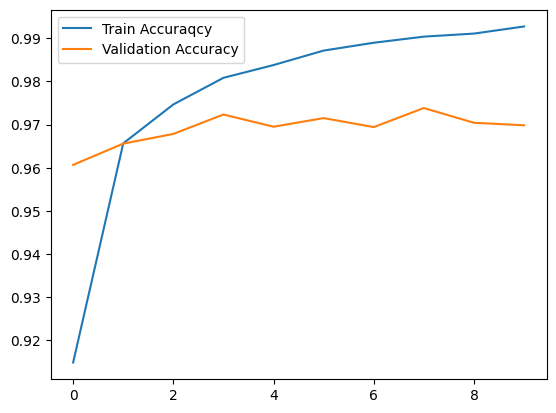

In [13]:
plot_graph(model=train_model, x='accuracy', y='val_accuracy', x_label='Train Accuraqcy', y_label='Validation Accuracy')

In [15]:
model.save('mnist_model.h5')

In [17]:

reloaded_model = load_model('mnist_model.h5')

In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

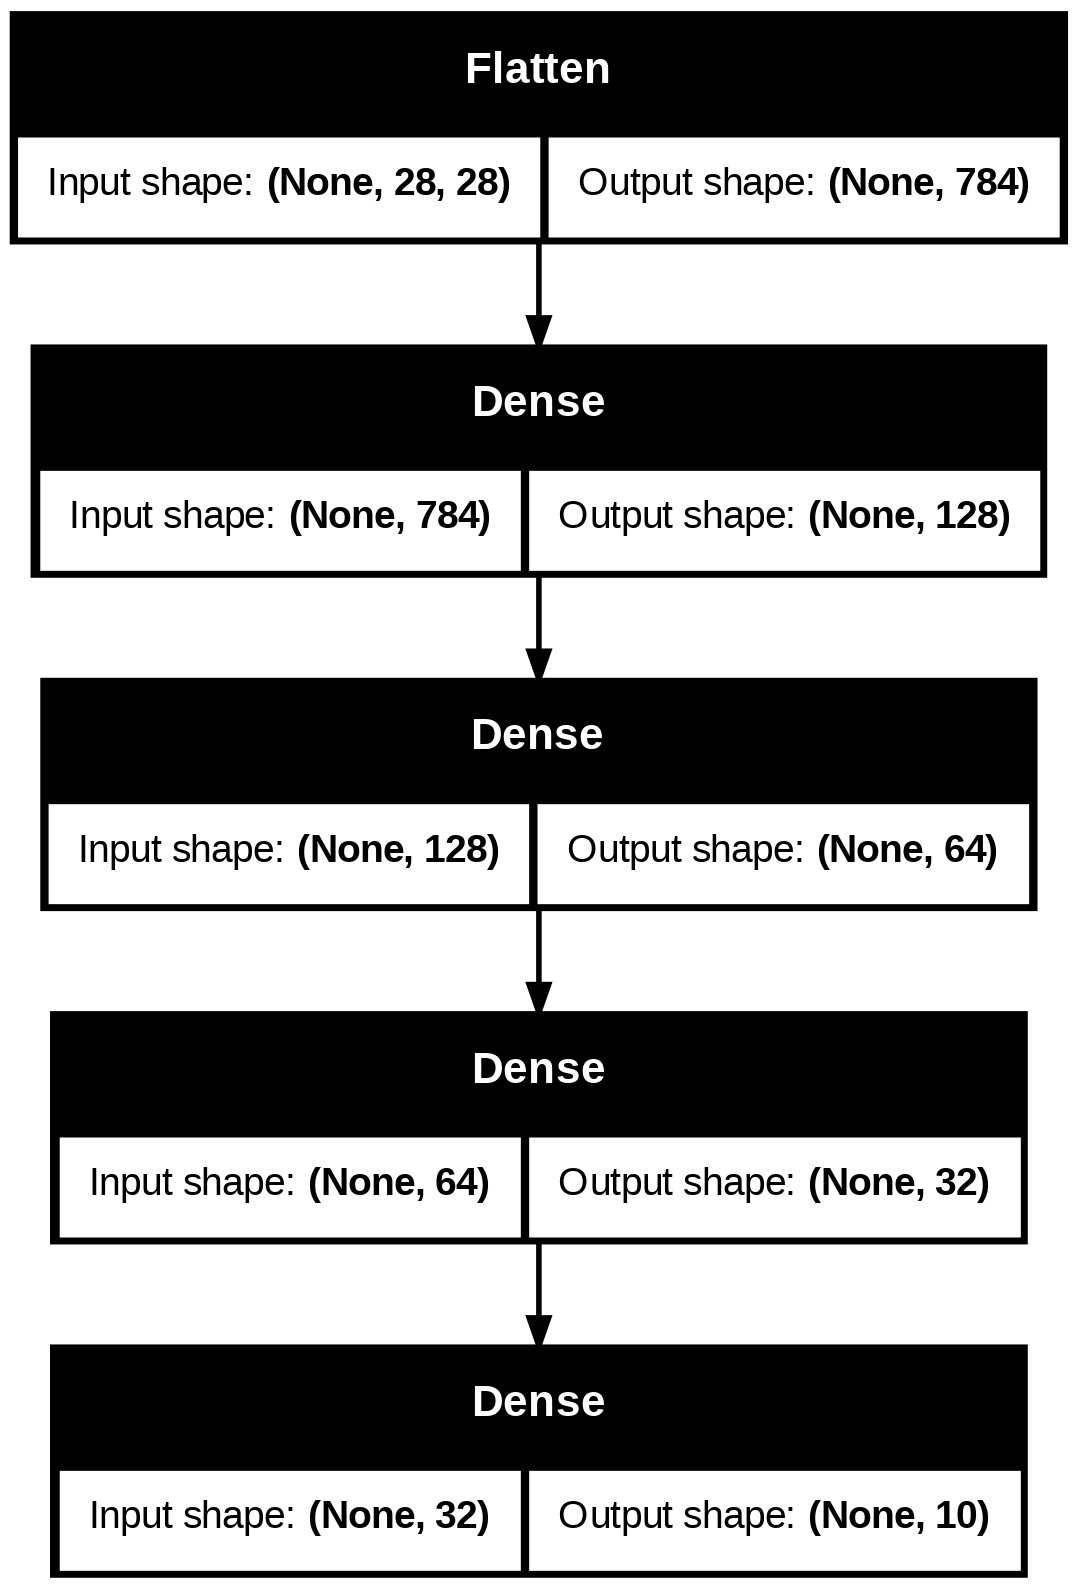

In [24]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_architecture.png')

In [27]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [29]:
model.save('mnist_models_scifers.h5')

Text(0, 0.5, 'Loss')

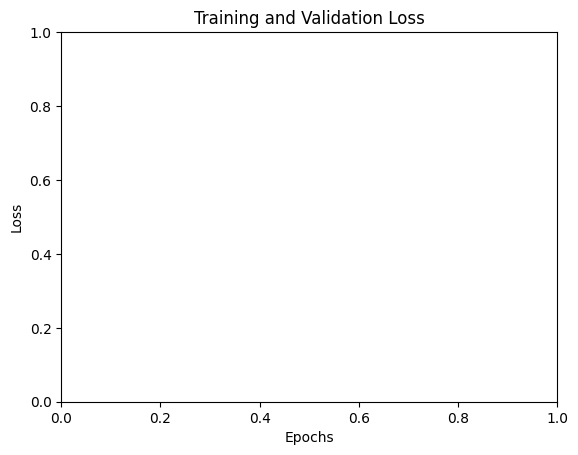

In [33]:
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [35]:
plt.show()
import tensorflow as tf

In [37]:
model = tf.keras.models.load_model('mnist_models_scifers.h5')

import numpy as np

In [40]:
x = np.reshape(x_test[0], (1, 28 * 28))

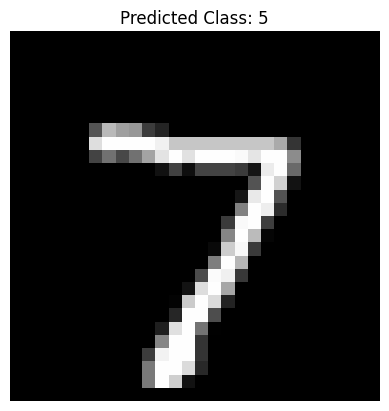

In [42]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()

In [43]:
num_images = 5
predictions = model.predict(x_test[:num_images])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


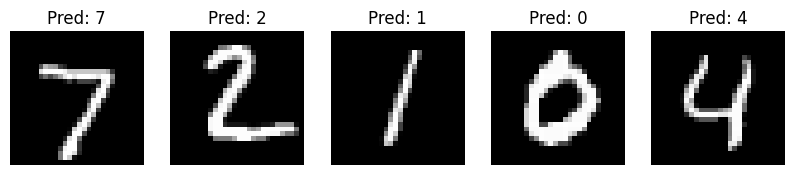

In [44]:
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

In [45]:
print(predicted_label)

5
